# Установка библиотек

In [ ]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 2.3MB 28.5MB/s 
     |████████████████████████████████| 3.3MB 47.9MB/s 
     |████████████████████████████████| 901kB 49.4MB/s 
     |████████████████████████████████| 235kB 26.8MB/s 
     |████████████████████████████████| 112kB 52.8MB/s 
     |████████████████████████████████| 245kB 46.2MB/s 


# Загрузка модели

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import BertTokenizer, BertModel
from transformers import BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')
#model_begin = BertModel.from_pretrained("DeepPavlov/rubert-base-cased-conversational")
model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/chatbot_project/models/tuned0')

import torch
from torch import nn

Some weights of the model checkpoint at /content/drive/MyDrive/chatbot_project/models/tuned0 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkp

# Загрузка датасетов

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url_facts4 = 'https://raw.githubusercontent.com/Koziev/NLP_Datasets/master/Samples/facts4.txt'
url_facts5 = 'https://raw.githubusercontent.com/Koziev/NLP_Datasets/master/Samples/facts5.txt'
url_facts6 = 'https://raw.githubusercontent.com/Koziev/NLP_Datasets/master/Samples/facts6.txt'
url_facts7_1s = 'https://raw.githubusercontent.com/Koziev/NLP_Datasets/master/Samples/facts7_1s.txt'
url_facts7_2s = 'https://raw.githubusercontent.com/Koziev/NLP_Datasets/master/Samples/facts7_2s.txt'
url_big_data = '/content/drive/MyDrive/chatbot_project/data/data_concat.txt'
url_lit = '/content/drive/MyDrive/chatbot_project/literature.txt'
url_jokes = '/content/drive/MyDrive/chatbot_project/jokes.txt'

In [ ]:
data_facts4 = pd.read_csv(url_facts4, sep="\t", header=None)
data_facts5 = pd.read_csv(url_facts5, sep="\t", header=None)
data_facts6 = pd.read_csv(url_facts6, sep="\t", header=None)
data_facts7_1s = pd.read_csv(url_facts7_1s, sep="\t", header=None)
data_facts7_2s = pd.read_csv(url_facts7_2s, sep="\t", header=None)
data_lit = pd.read_csv(url_lit, sep="\t", header=None)
data_jokes = pd.read_csv(url_jokes, sep="\t", header=None)

#data_facts4 = pd.read_csv(url_facts4, sep="\t", header=None)
#data_big = data_facts4

In [ ]:
print(len(data_facts4))
print(len(data_facts5))
print(len(data_facts6))
print(len(data_facts7_1s))
print(len(data_facts7_2s))
print(len(data_lit))
print(len(data_jokes))

98935
100326
103436
19235
59027
1825451
35037


In [ ]:
data_big = pd.concat([data_facts4, data_facts5, data_facts6, data_facts7_1s, data_facts7_2s, data_lit])

In [ ]:
data_big[1] = 0
data_jokes[1] = 1

In [ ]:
data_big

,0,1
0,Дик покачал головой,0
1,Яр покачал головой,0
2,Кат покачал головой,0
3,Вася покачал головой,0
4,Рон покачал головой,0
...,...,...
1825446,"Они были мертвы, зародыши в",0
1825447,них были прикончены.,0
1825448,Необозримые пространства земли еще долго гнил...,0
1825449,"крокодилов и змей, вызванных к жизни таин...",0


In [ ]:
# уменьшаем размер датасета
data = data_big
msk = np.random.rand(len(data)) < 0.05
data = data[msk]

In [ ]:
data = pd.concat([data, data_jokes])

In [ ]:
data

,0,1
0,Дик покачал головой,0
7,Толя покачал головой,0
46,Гоша покачал головой,0
58,Сыщик покачал головой,0
68,Лабан покачал головой,0
...,...,...
35032,"Где у вас была совесть, там у вас член вырос!",1
35033,Лучшее окончание спора с женщиной - притворить...,1
35034,"Жадность это не порок, а необходимость...",1
35035,"Сколько здоровья ни желай, а хоронить придется.",1


In [ ]:
last = len(data)
last

145003

In [ ]:
train_part = 0.93

msk = np.random.rand(len(data)) < train_part
data_train = data[msk] 
data_test = data[~msk]

print("train len =", len(data_train), " test len =", len(data_test))

train len = 134966  test len = 10037


In [ ]:
from datasets import Dataset

dataset_train = Dataset.from_pandas(data_train)
dataset_eval = Dataset.from_pandas(data_test)

dataset_train = dataset_train.shuffle()
dataset_eval = dataset_eval.shuffle()

In [ ]:
def tokenize_function(examples):
    res = tokenizer(examples["0"])
    if len(res['input_ids']) > 30:
        for name in res:
            res[name] = res[name][:30] + [res[name][-1]]
    res['targets'] = examples["1"]
    return res

In [ ]:
tokenized_dataset_train = dataset_train.map(tokenize_function, batched=False, num_proc=4, remove_columns=["0", "__index_level_0__"])
tokenized_dataset_eval = dataset_eval.map(tokenize_function, batched=False, num_proc=4, remove_columns=["0", "__index_level_0__"])

# Получение data_loader с хорошим семплером

In [ ]:
from transformers import Trainer, TrainingArguments
from torch.utils.data.dataloader import DataLoader

In [ ]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=0.0)

In [ ]:
# from https://github.com/huggingface/transformers/blob/master/src/transformers/trainer_pt_utils.py
# тут лежат подобные функции от huggingface
# их ещё не добавили в библиотеку и вообще там странный код с другим предназначением

import math
from torch.utils.data.distributed import DistributedSampler
from typing import Iterator, List, Optional, Union

def get_indices(lengths, batch_size, generator=None):
    # применяем случайную перестановку к датасету и сортируем по длине
    indices = torch.randperm(len(lengths), generator=generator)
    len_sorted = list(sorted(indices.tolist(), key=lambda i: lengths[i], reverse=True)) 

    # делим на батчи (почти во всех батчах длина одинаковая)
    batches = [len_sorted[i : i + batch_size] for i in range(0, len(lengths), batch_size)]
    batches_cnt = len(batches)
  
    # применяем случайную перестановку к батчам
    # в конец докидывается последний батч, так как он может быть меньше batch_size
    batch_indices = torch.randperm(batches_cnt - 1, generator=generator)
    rand_batches = [batches[batch_ind] for batch_ind in batch_indices]
    res = sum(rand_batches, []) + batches[batches_cnt - 1]
    return res 

class DistributedLengthSortedSampler(DistributedSampler):
    # Copied and adapted from PyTorch DistributedSampler.
    # https://github.com/pytorch/pytorch/blob/master/torch/utils/data/distributed.py

    def __init__(
        self,
        dataset: Dataset,
        batch_size: int,
        num_replicas: Optional[int] = None,
        rank: Optional[int] = None,
        seed: int = 0,
        drop_last: bool = False,
        lengths: Optional[List[int]] = None,
    ):
        if num_replicas is None:
            if not dist.is_available():
                raise RuntimeError("Requires distributed package to be available")
            num_replicas = dist.get_world_size()
        if rank is None:
            if not dist.is_available():
                raise RuntimeError("Requires distributed package to be available")
            rank = dist.get_rank()
        self.dataset = dataset
        self.batch_size = batch_size
        self.num_replicas = num_replicas
        self.rank = rank
        self.epoch = 0
        self.drop_last = drop_last

        # If the dataset length is evenly divisible by # of replicas, then there
        # is no need to drop any data, since the dataset will be split equally.
        if self.drop_last and len(self.dataset) % self.num_replicas != 0:
            # Split to nearest available length that is evenly divisible.
            # This is to ensure each rank receives the same amount of data when
            # using this Sampler.
            self.num_samples = math.ceil((len(self.dataset) - self.num_replicas) / self.num_replicas)
        else:
            self.num_samples = math.ceil(len(self.dataset) / self.num_replicas)
        self.total_size = self.num_samples * self.num_replicas
        self.seed = seed

        if lengths is None:
            if not isinstance(dataset[0], dict) or "input_ids" not in dataset[0]:
                raise ValueError(
                    "Can only automatically infer lengths for datasets whose items are dictionaries with an "
                    "'input_ids' key."
                )
            lengths = [len(feature["input_ids"]) for feature in dataset]
        self.lengths = lengths

    def __iter__(self) -> Iterator:
        # Deterministically shuffle based on epoch and seed
        g = torch.Generator()
        g.manual_seed(self.seed + self.epoch)
        indices = get_indices(self.lengths, self.batch_size, generator=g)

        if not self.drop_last:
            # add extra samples to make it evenly divisible
            indices += indices[: (self.total_size - len(indices))]
        else:
            # remove tail of data to make it evenly divisible.
            indices = indices[: self.total_size]
        assert len(indices) == self.total_size

        # subsample
        indices = indices[self.rank : self.total_size : self.num_replicas]
        assert len(indices) == self.num_samples

        return iter(indices)

In [ ]:
# https://huggingface.co/transformers/master/_modules/transformers/trainer.html#Trainer.get_train_dataloader

from typing import Optional
from transformers.training_args import ParallelMode
import torch
class CustomTrainer(Trainer):
    def get_processes_info(self):
        # Gather the number of processes and this process index.
        if self.args.parallel_mode == ParallelMode.TPU:
            num_processes = xm.xrt_world_size()
            process_index = xm.get_ordinal()
        elif (
            self.args.parallel_mode == ParallelMode.DISTRIBUTED
        ):
            num_processes = dist.get_world_size()
            process_index = dist.get_rank()
        else:
            num_processes = 1
            process_index = 0

        return num_processes, process_index

    def get_train_dataloader(self) -> DataLoader:
        if self.train_dataset is None:
            raise ValueError("Trainer: training requires a train_dataset.")

        num_processes, process_index = self.get_processes_info()

        train_sampler = DistributedLengthSortedSampler(
            self.train_dataset, 
            self.args.train_batch_size, 
            num_replicas=num_processes, 
            rank=process_index
        )

        return DataLoader(
            self.train_dataset,
            batch_size=self.args.train_batch_size,
            sampler=train_sampler,
            shuffle=False,
            collate_fn=self.data_collator,
            drop_last=self.args.dataloader_drop_last,
            num_workers=self.args.dataloader_num_workers,
        )

    def get_eval_dataloader(self, eval_dataset: Optional[Dataset] = None) -> DataLoader:
        if eval_dataset is None and self.eval_dataset is None:
            raise ValueError("Trainer: evaluation requires an eval_dataset.")
        elif eval_dataset is not None and not isinstance(eval_dataset, collections.abc.Sized):
            raise ValueError("eval_dataset must implement __len__")
        elif isinstance(eval_dataset, Dataset):
            self._remove_unused_columns(eval_dataset, description="evaluation")
        eval_dataset = eval_dataset if eval_dataset is not None else self.eval_dataset

        num_processes, process_index = self.get_processes_info()

        eval_sampler = DistributedLengthSortedSampler(
            eval_dataset, 
            self.args.eval_batch_size, 
            num_replicas=num_processes, 
            rank=process_index
        )

        return DataLoader(
            eval_dataset,
            sampler=eval_sampler,
            batch_size=self.args.eval_batch_size,
            collate_fn=self.data_collator,
            drop_last=self.args.dataloader_drop_last,
            num_workers=self.args.dataloader_num_workers,
            pin_memory=self.args.dataloader_pin_memory,
        )

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    evaluation_strategy = "steps",   
    num_train_epochs=1,              # total number of training epochs
    learning_rate=0.015,
    overwrite_output_dir=True, 
    logging_steps = 2000,
    save_steps = 9000,
    warmup_steps=500,                 # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
)

In [ ]:
cTrainer = CustomTrainer(model=model,
    args=training_args,
    train_dataset=tokenized_dataset_train,
    eval_dataset=tokenized_dataset_eval,
    data_collator=data_collator,
)

In [ ]:
from torch.utils.data.dataloader import DataLoader
loader_train = cTrainer.get_train_dataloader()
loader_eval = cTrainer.get_eval_dataloader()

# Обучение

In [ ]:
from tqdm import tqdm
device = torch.device('cuda')

In [ ]:
def tokenize_function(examples):
    res = tokenizer(examples["0"])
    if len(res['input_ids']) > 30:
        for name in res:
            res[name] = res[name][:30] + [res[name][-1]]
    res['targets'] = examples["1"]
    return res

In [ ]:
def calc_stats(data_loader,
               model):
  losses = []
  correct = 0
  all = 0
  for batch in data_loader:
    attention_mask = batch['attention_mask'].to(device)
    input_ids = batch['input_ids'].to(device)
    targets = batch['targets'].to(device)

    outputs = model(input_ids = input_ids, attention_mask = attention_mask, labels = targets)
    loss = outputs['loss']
    
    losses.append(loss.item())
    prob = torch.softmax(outputs['logits'], dim=1);
    predict = torch.argmax(prob, axis=-1)
    #print(prob)
    correct += (predict == targets).sum().item()
    all += predict.shape[0]

  accuracy = correct / all
  print("correct:", correct, "all:", all)
  print("mean loss:", np.mean(losses))
  print("mean accuracy:", np.mean(accuracy))
  print()

In [ ]:
calc_stats(data_loader = loader_eval,
           model = model)

correct: 6764 all: 10037
mean loss: 0.6728996329573521
mean accuracy: 0.6739065457806117


In [ ]:
def model_train(num_train_epochs,
                data_loader_train,
                data_loader_eval,
                model,
                optimizer,
                validate_iters):
  iter = 1
  losses = []
  for epoch in range(num_train_epochs):
    print("epoch iters = ", len(data_loader_train))
    for batch in data_loader_train:
      attention_mask = batch['attention_mask'].to(device)
      input_ids = batch['input_ids'].to(device)
      targets = batch['targets'].to(device)

      outputs = model(input_ids = input_ids, attention_mask = attention_mask, labels = targets)
      loss = outputs['loss']
      losses.append(loss.item())

      if (iter % validate_iters) == 0:
        print("iter = ", iter)
        calc_stats(data_loader = data_loader_eval,
                   model = model)
      iter += 1

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    print("epoch ", epoch, " mean loss:", np.mean(losses))
  return losses

In [ ]:
import torch.optim as optim

In [ ]:
losses = model_train(num_train_epochs = 1,
            data_loader_train = loader_train,
            data_loader_eval = loader_eval,
            model = model,
            optimizer = optim.Adam(model.parameters(), lr=2e-5),
            validate_iters=2000)

epoch iters =  16871
iter =  2000
correct: 9488 all: 10037
mean loss: 0.13605901897287523
mean accuracy: 0.9453023811895985

iter =  4000
correct: 9579 all: 10037
mean loss: 0.11320863222201036
mean accuracy: 0.9543688353093553

iter =  6000
correct: 9678 all: 10037
mean loss: 0.09875193217294327
mean accuracy: 0.9642323403407392

iter =  8000
correct: 9640 all: 10037
mean loss: 0.10387549314054705
mean accuracy: 0.9604463485105111

iter =  10000
correct: 9673 all: 10037
mean loss: 0.09226248204363491
mean accuracy: 0.9637341835209724

iter =  12000
correct: 9717 all: 10037
mean loss: 0.08483926032127653
mean accuracy: 0.9681179635349207

iter =  14000
correct: 9612 all: 10037
mean loss: 0.10455716958388211
mean accuracy: 0.9576566703198167

iter =  16000
correct: 9700 all: 10037
mean loss: 0.08752422273463747
mean accuracy: 0.9664242303477134

epoch  0  mean loss: 0.1010059182065751


In [ ]:
#model.save_pretrained("/jokes_bert")
#model.save_pretrained("/content/drive/MyDrive/chatbot_project/jokes_bert")

# Проверка

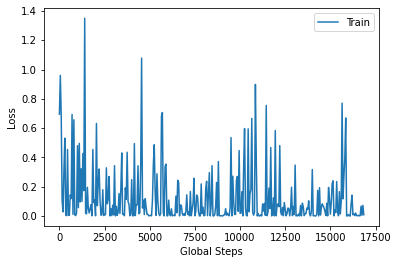

In [ ]:
import matplotlib.pyplot as plt
cnt = len(losses)
plt.plot(range(cnt)[::50], losses[::50], label='Train')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [ ]:
def calc_sentence(s, model):
  tokenized = tokenizer(s, return_tensors="pt")
  outputs = model(**tokenized)
  prob = torch.softmax(outputs['logits'], dim=1);
  predict = torch.argmax(prob, axis=-1).item()
  return predict, prob

calc_sentence("Он добежал до моего дома.", model)

(0, tensor([[0.9952, 0.0048]], grad_fn=<SoftmaxBackward>))

In [ ]:
s_list = [
          "Он добежал до моего дома.",
          "Он добежал до к моего дома.",
          "Он добежал",
          "Ладно, я пошёл по делам, пока",
          "Я пишу тебе",
          "Уже полгода как записался на фитнес. Завтра схожу.",
          "Только в России все атеисты православные.",
          "Не тот футбол назвали Мундиалем...",
          "Необозримые пространства земли ещё долго гнили под солнцем.",
          "Не страшна мама так, как её рисуют одноклассники.",
          "Я люблю гулять по улицам.",
          "Секс это конечно хорошо, но кого мы пытаемся обмануть.",
          "Учёные доказали, то сначала появились негры, а потом люди.",
          "Привет!!!!!!!!!!!!!!!!!!!!",
          "Здарова",
          "Привет!",
          "Привет???",
          "Ааааа, даааааааадааааа ааааа дааада",
          "Купил мужик шляпу, а она ему как раз",
          "Привет) расскажи о себе",
          "Привет) под вкусный кофеек настроение поболтать появилось )",
          "Что читаешь? Мне нравится классика",
          "Я тоже люблю пообщаться",
          "Люблю животных, просто обожаю, как и свою работу)",
          "Я фантастику люблю",
          "А я выращиваю фиалки",
          "И веду здоровый и активный образ жизни!",
          "Ух ты, интересно.",
          "Ты случайно не принц на белом коне? Я его очень жду ..",
          "А у меня из хобби каждую неделю тусить с моим лучшим другом)",
          "Привет!",
          "Привет,Как жизнь?",
          "Отлично) Солнышко светит, птички поют!",
          "Я вот сегодня понял, что меня тупо используют, всем нужны от меня лишь деньги, ненавижу людей",
          "Чем занимаешься по жизни, я вот бизнесмен.",
          "А я вот учу детей, работаю с начальными классами",
          "Не все люди такие, как ты говоришь",
          "Помимо работы чем еще ты занимаешься?",
          "К свадьбе готовлюсь",
          "А ты?",
          "Вот видишь) значит, нашел такую женщину, которой не нужны от тебя деньги",
         ]
for s in s_list:
  ans, probs = calc_sentence(s, model)
  print(("ahah" if ans else "bruh"), probs[0][1].item() * 100.0, "%\t", s)

bruh 0.47709420323371887 %	 Он добежал до моего дома.
bruh 0.5230116192251444 %	 Он добежал до к моего дома.
bruh 0.024336136993952096 %	 Он добежал
bruh 0.024718831991776824 %	 Ладно, я пошёл по делам, пока
bruh 0.026815308956429362 %	 Я пишу тебе
ahah 99.94637370109558 %	 Уже полгода как записался на фитнес. Завтра схожу.
ahah 82.23211169242859 %	 Только в России все атеисты православные.
ahah 98.88302683830261 %	 Не тот футбол назвали Мундиалем...
bruh 28.230944275856018 %	 Необозримые пространства земли ещё долго гнили под солнцем.
ahah 98.7705647945404 %	 Не страшна мама так, как её рисуют одноклассники.
bruh 6.010332331061363 %	 Я люблю гулять по улицам.
ahah 97.49131202697754 %	 Секс это конечно хорошо, но кого мы пытаемся обмануть.
ahah 96.6579020023346 %	 Учёные доказали, то сначала появились негры, а потом люди.
bruh 1.860981434583664 %	 Привет!!!!!!!!!!!!!!!!!!!!
bruh 0.024496697005815804 %	 Здарова
bruh 0.0805006013251841 %	 Привет!
bruh 0.08891484467312694 %	 Привет???
bru

In [ ]:
file_in = open("/content/drive/MyDrive/chatbot_project/phrases.txt", "r")

In [ ]:
# 259964

In [ ]:
good = []
for s in tqdm(file_in):
  ans, probs = calc_sentence(s[:-1], model)
  if ans:
    good.append([probs[0][1].item() * 100.0, s[:-1]])


0it [00:00, ?it/s]
8it [00:00, 77.17it/s]
16it [00:00, 77.43it/s]
24it [00:00, 77.39it/s]
33it [00:00, 78.72it/s]
41it [00:00, 78.77it/s]
49it [00:00, 76.33it/s]
57it [00:00, 76.45it/s]
65it [00:00, 75.04it/s]
73it [00:00, 74.60it/s]
81it [00:01, 76.12it/s]
89it [00:01, 76.18it/s]
97it [00:01, 75.03it/s]
105it [00:01, 74.75it/s]
113it [00:01, 74.05it/s]
121it [00:01, 74.45it/s]
129it [00:01, 74.46it/s]
137it [00:01, 72.41it/s]
145it [00:01, 73.01it/s]
153it [00:02, 74.97it/s]
161it [00:02, 73.59it/s]
169it [00:02, 74.58it/s]
177it [00:02, 74.58it/s]
185it [00:02, 75.64it/s]
193it [00:02, 75.16it/s]
201it [00:02, 75.68it/s]
209it [00:02, 76.89it/s]
217it [00:02, 76.59it/s]
226it [00:02, 78.29it/s]
234it [00:03, 76.09it/s]
242it [00:03, 77.13it/s]
251it [00:03, 78.29it/s]
259it [00:03, 77.33it/s]
267it [00:03, 76.95it/s]
275it [00:03, 72.67it/s]
283it [00:03, 73.91it/s]
291it [00:03, 74.58it/s]
299it [00:03, 75.63it/s]
307it [00:04, 76.73it/s]
315it [00:04, 77.20it/s]
323it [00:04, 76.6

KeyboardInterrupt: ignored

In [ ]:
len(good)

79

In [ ]:
good

[[99.93420243263245, 'Ты случайно не принц на белом коне? Я его очень жду ..'],
 [86.15042567253113, 'Чем занимаешься по жизни, я вот бизнесмен.'],
 [90.67810773849487, 'Люблю готовить пасту,  у меня классно получается!'],
 [94.92220878601074, 'А я тоже хочу. На машину скопить.'],
 [99.94688630104065,
  'Нормально, готовлюсь ко сну. Завтра снова в школу . Не люблю учиться.'],
 [99.69730377197266,
  'Ещё не решила, может быть детектив какой нибудь. А как в школе у тебя?'],
 [99.94181394577026,
  'Хорошо, ещё учусь, но скоро закончу. Уже мечтаю работать , а не сидеть за учебниками. А ты работаешь или учишься ещё?'],
 [71.2326169013977,
  'А я работаю, мне нравится моя работа, кем планируешь работать?'],
 [99.91023540496826, 'Хочу быть психологом. А кем ты работаешь?'],
 [99.82820749282837, 'Это классно. Хочу также. А ты одна живешь?'],
 [96.67087197303772,
  'Я тоже с родителями живу, обожаю их. Но иногда хочется пожить одной.'],
 [99.94394183158875,
  'А у меня мама домохозяйка, поэтому

## тесты LM

In [ ]:
device = torch.device('cuda')

def make_sentence(tokens):
  s = ''
  for token in tokens:
    if (token == '[CLS]' or token == '[SEP]' or token == '[PAD]'):
      continue
    if ('##' in token):
      s += token.replace('##', '')
    else:
      s += ' ' + token
  if s[0] == ' ':
    s = s[1:]
  return s

def swap_sample(target="Вася покачал головой", swaps = 1):
  inputs = tokenizer(target, return_tensors="pt").to(device)
  #print(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))
  #print()
  res = inputs['input_ids'][0]
  #print(res)
  #print()
  tokens_cnt = len(res)
  for i in range(swaps):
    ind1 = np.random.randint(1, tokens_cnt - 1)
    ind2 = np.random.randint(1, tokens_cnt - 1)
    #print(ind1, ind2)
    tmp = res[ind1].item()
    res[ind1] = res[ind2].item()
    res[ind2] = tmp

  tokens = tokenizer.convert_ids_to_tokens(res)
  #print(tokens)
  #print()
  s = make_sentence(tokens)
  #print(s)
  #print()
  return s

swap_sample(swaps = 5)

bad = np.random.rand(len(data)) < 0.5
for i in range(len(data)):
  if bad[i]:
    data[0].iloc[i] = swap_sample(str(data[0].iloc[i]), swaps=1) 
    data[1].iloc[i] = 0